# Projet: Uber Pickups using KMEANS  15 oct 2021
**<p>Author: Said SOUFYAN</p>**

# EDA and exploring Data

**Installing packages and import librairies**

In [1]:
!pip install plotly
!pip install seaborn
!pip install mlxtend
import pandas as pd
import seaborn as sns
import datetime
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import warnings

from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings
np.set_printoptions(edgeitems=30, linewidth=100000, 
    formatter=dict(float=lambda x: "%.3g" % x))
pio.renderers.default = "iframe_connected"

import math

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score

In [2]:
# Import dataset
print("Loading dataset...")
ds = pd.read_csv("src/Walmart_Store_sales.csv")
print("...Done.")
print()

Loading dataset...
...Done.



In [3]:
ds.describe()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
mean,9.866667,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000
max,20.000000,2.771397e+06,1.000000,91.650000,4.193000,226.968844,14.313000


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000,0.115964,-0.025545,-0.260421,0.183379,-0.587729,0.224478
Weekly_Sales,0.115964,1.000000,0.037037,-0.165991,-0.019087,-0.287227,0.055191
Holiday_Flag,-0.025545,0.037037,1.000000,-0.187922,-0.117447,0.171969,0.096934
Temperature,-0.260421,-0.165991,-0.187922,1.000000,0.048943,0.137936,-0.030122
Fuel_Price,0.183379,-0.019087,-0.117447,0.048943,1.000000,-0.159881,0.086241
CPI,-0.587729,-0.287227,0.171969,0.137936,-0.159881,1.000000,-0.348072
Unemployment,0.224478,0.055191,0.096934,-0.030122,0.086241,-0.348072,1.000000


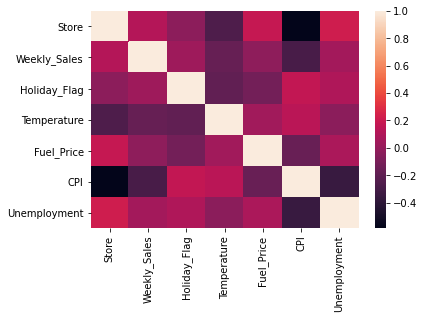

In [4]:
sns.heatmap(ds.corr())
ds.corr()

In [5]:
ds.isna().sum()
#ds.Date.count()

Store            0
Date            18
Weekly_Sales    14
Holiday_Flag    12
Temperature     18
Fuel_Price      14
CPI             12
Unemployment    15
dtype: int64

In [6]:
filter=ds.loc[ds["Store"]==1,:]
mask=(ds["Store"]==1)
ds[mask].head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
13,1.0,16-03-2012,1677472.78,0.0,64.74,3.734,221.211813,7.348
42,1.0,NaN,1661767.33,1.0,NaN,3.730,222.439015,6.908
44,1.0,12-02-2010,1641957.44,1.0,38.51,2.548,211.242170,8.106
48,1.0,05-08-2011,1624383.75,NaN,91.65,3.684,215.544618,7.962
73,1.0,27-08-2010,1449142.92,NaN,85.22,2.619,211.567306,7.787
74,1.0,19-10-2012,1508068.77,0.0,67.97,3.594,223.425723,NaN
78,1.0,18-11-2011,1539483.70,0.0,62.25,3.308,218.220509,7.866
95,1.0,14-05-2010,1494251.50,0.0,74.78,2.854,210.337426,7.808
109,1.0,09-12-2011,NaN,NaN,43.93,3.158,218.961846,7.866
123,1.0,27-05-2011,1466046.67,0.0,NaN,3.786,215.503788,7.682


In [7]:
# Visualize average Price vs. HouseAge
mask = (ds["Store"]<=2)
gr= ds[mask].groupby("Date").agg(
    agg=pd.NamedAgg(column="Weekly_Sales", aggfunc="mean")).reset_index()

gr["Date2"]= pd.to_datetime(gr['Date'])
#gr.head(10)
#ds["DateC"]=pd.to_datetime(ds['Date'])
#px.bar(ds[mask], x = 'DateC', y = 'Weekly_Sales',color="Store")

<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

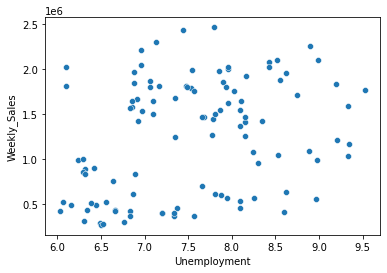

In [8]:
mask= (ds["Unemployment"]<10) & (ds["Unemployment"]>6  )
sns.scatterplot(data=ds[mask], x="Unemployment", y="Weekly_Sales")

<AxesSubplot:xlabel='CPI', ylabel='Weekly_Sales'>

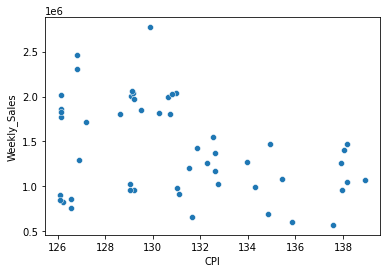

In [9]:
mask= (ds["CPI"] <140 )
sns.scatterplot(data=ds[mask], x="CPI", y="Weekly_Sales")

<AxesSubplot:xlabel='Fuel_Price', ylabel='Weekly_Sales'>

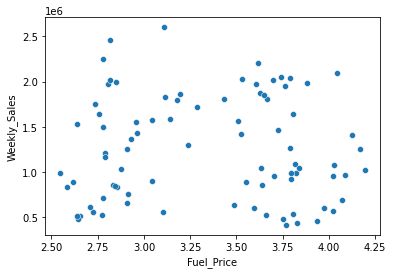

In [10]:

ds["Store"]=ds.Store.astype('int64')
#print(ds.head(100))
mask = ds.loc[ds["Store"] > 5 ,:]
sns.scatterplot(data=mask, x="Fuel_Price", y="Weekly_Sales")

In [11]:
# add a column for Month
#ds['Month'] = ds['DateC'].dt.month
# add a column for Day
#ds['Day'] = ds['DateC'].dt.day
# add a column for Day of the Year
#ds['Day of Year'] = ds['DateC'].dt.dayofyear
# show the dataframe
#print("done")

In [12]:
ds["Month"]=pd.to_datetime(ds['Date']).dt.month

    


In [13]:
#px.bar(ds, x = "Month", y = 'Weekly_Sales',color="Store")
#sns.scatterplot(data=ds, x="Year", y="Weekly_Sales")

In [14]:
ds.dropna(subset = ["Weekly_Sales"], inplace=True)

In [15]:
print(ds[:5])

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      6  18-02-2011    1572117.54           NaN        59.61       3.045   
1     13  25-03-2011    1807545.43           0.0        42.38       3.435   
3     11         NaN    1244390.03           0.0        84.57         NaN   
4      6  28-05-2010    1644470.66           0.0        78.89       2.759   
5      4  28-05-2010    1857533.70           0.0          NaN       2.756   

          CPI  Unemployment  Month  
0  214.777523         6.858    2.0  
1  128.616064         7.470    3.0  
3  214.556497         7.346    NaN  
4  212.412888         7.092    5.0  
5  126.160226         7.896    5.0  


In [16]:
# Drop useless columns / columns with too many missing values
useless_cols = ['Store','Date']

print("Dropping useless columns...")
ds = ds.drop(useless_cols, axis=1)
print("...Done.")
print(ds.head())

Dropping useless columns...
...Done.
   Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0    1572117.54           NaN        59.61       3.045  214.777523   
1    1807545.43           0.0        42.38       3.435  128.616064   
3    1244390.03           0.0        84.57         NaN  214.556497   
4    1644470.66           0.0        78.89       2.759  212.412888   
5    1857533.70           0.0          NaN       2.756  126.160226   

   Unemployment  Month  
0         6.858    2.0  
1         7.470    3.0  
3         7.346    NaN  
4         7.092    5.0  
5         7.896    5.0  


In [17]:
# Drop lines containing outliers (using masks)

print('avant Number of lines remaining : ', ds.shape[0])
print('Dropping outliers in ...')
list_cols = ["Fuel_Price","Unemployment","Temperature","CPI"]
for i in list_cols:
    print(i)
    to_keep =(ds[i].isna()) | ( (ds[i] < ds[i].mean() + 3*ds[i].std()) & (ds[i] > ds[i].mean() - 3*ds[i].std()) )
    ds = ds.loc[to_keep,:]
print('Done. Number of lines remaining : ', ds.shape[0])
print()

ds.head(10)

avant Number of lines remaining :  136
Dropping outliers in ...
Fuel_Price
Unemployment
Temperature
CPI
Done. Number of lines remaining :  131



,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month
0,1572117.54,NaN,59.61,3.045,214.777523,6.858,2.0
1,1807545.43,0.0,42.38,3.435,128.616064,7.470,3.0
3,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN
4,1644470.66,0.0,78.89,2.759,212.412888,7.092,5.0
5,1857533.70,0.0,NaN,2.756,126.160226,7.896,5.0
6,695396.19,0.0,69.80,4.069,134.855161,7.658,3.0
7,2203523.20,0.0,39.93,3.617,213.023623,6.961,3.0
8,2600519.26,0.0,30.54,3.109,NaN,NaN,10.0
9,418925.47,0.0,60.12,3.555,224.132020,6.833,NaN
10,895066.50,0.0,82.92,3.554,219.070197,6.425,8.0


In [18]:
ds[ds["Holiday_Flag"]==1].count()

Weekly_Sales    8
Holiday_Flag    8
Temperature     7
Fuel_Price      7
CPI             7
Unemployment    8
Month           7
dtype: int64

In [19]:
# Separate target variable Y from features X
target_name = 'Weekly_Sales'

print("Separating labels from features...")
Y = ds.loc[:,target_name]
X = ds.loc[:,[c for c in ds.columns if c!=target_name]] # All columns are kept, except the target
X_sav = ds.loc[:,[c for c in ds.columns if c!=target_name]] 
print("...Done.")
print(Y.head())
print()
print(X.head())
print()

Separating labels from features...
...Done.
0    1572117.54
1    1807545.43
3    1244390.03
4    1644470.66
5    1857533.70
Name: Weekly_Sales, dtype: float64

   Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  Month
0           NaN        59.61       3.045  214.777523         6.858    2.0
1           0.0        42.38       3.435  128.616064         7.470    3.0
3           0.0        84.57         NaN  214.556497         7.346    NaN
4           0.0        78.89       2.759  212.412888         7.092    5.0
5           0.0          NaN       2.756  126.160226         7.896    5.0



In [20]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X = X.values
Y = Y.tolist()
#Y= Y
print("...Done")
print(X[0:5,:])
print()
print(Y[0:5])

Convert pandas DataFrames to numpy arrays...
...Done
[[nan 59.6 3.04 215 6.86 2]
 [0 42.4 3.44 129 7.47 3]
 [0 84.6 nan 215 7.35 nan]
 [0 78.9 2.76 212 7.09 5]
 [0 nan 2.76 126 7.9 5]]

[1572117.54, 1807545.43, 1244390.03, 1644470.66, 1857533.7]


In [21]:
len(Y)

131

In [22]:
# First : always divide dataset into train set & test set !!
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
# test_size indicates the proportion of rows from X and Y that will go into the test dataset while 
# maintaining the correspondance between the rows from X and Y 

# random_state is an argument that can be found in all functions that have a pseudo-random behaviour
# if random_state is not stated the function will derive a different random result everytime the cell 
# runs, if random_state is given a value the results will be the same everytime the cell runs while
# each different value of radom_state will derive a specific result
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [23]:
print(X[0:5,:])

[[nan 59.6 3.04 215 6.86 2]
 [0 42.4 3.44 129 7.47 3]
 [0 84.6 nan 215 7.35 nan]
 [0 78.9 2.76 212 7.09 5]
 [0 nan 2.76 126 7.9 5]]


In [24]:
# Create pipeline for numeric features

numeric_features = [1,2,3,4] # Positions of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
        
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='mean'))
])

to_imput = [0]
numeric_imput = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

#passer le mois en cat
categorical_features = [5] # Positions of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])



In [25]:
# Use ColumnTranformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[       
        ('num', numeric_transformer, numeric_features),
        ('num2', numeric_imput , to_imput),
        ('catdate', categorical_transformer,categorical_features)        
        
    ])



In [26]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train[0:5,:])
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5,:])
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test[:5,:])
X_test = preprocessor.transform(X_test) # Don't fit again !!
print('...Done.')
print(X_test[:5,:])
print()


Performing preprocessings on train set...
[[0 36.8 2.82 127 7.79 10]
 [0 32.7 nan 130 6.1 1]
 [0 48.3 3.75 197 6.16 3]
 [0 76.3 2.85 nan 7.95 8]
 [0 72.8 2.93 133 8.1 7]]
...Done.
[[-1.29 -1.07 -1.39 0.437 0 0 0 0 0 0 0 0 0 1 0 0]
 [-1.52 1.2e-15 -1.3 -1.32 0 0 0 0 0 0 0 0 0 0 0 0]
 [-0.643 0.88 0.432 -1.26 0 0 1 0 0 0 0 0 0 0 0 0]
 [0.929 -1 2.22e-17 0.599 0 0 0 0 0 0 0 1 0 0 0 0]
 [0.732 -0.831 -1.24 0.753 0 0 0 0 0 0 1 0 0 0 0 0]]

Performing preprocessings on test set...
[[0 60.1 3.56 224 6.83 nan]
 [0 45.7 2.57 214 7.37 5]
 [0 69.8 3.81 135 8.89 nan]
 [0 75.3 2.58 215 6.32 9]
 [0 nan 3.63 221 5.94 nan]]
...Done.
[[0.02 0.473 1.12 -0.56 0 0 0 0 0 0 0 0 0 0 0 1]
 [-0.787 -1.58 0.871 -0.00554 0 0 0 0 1 0 0 0 0 0 0 0]
 [0.56 1.02 -1.17 1.57 0 0 0 0 0 0 0 0 0 0 0 1]
 [0.872 -1.56 0.883 -1.1 0 0 0 0 0 0 0 0 1 0 0 0]
 [-1.14e-16 0.629 1.05 -1.48 0 0 0 0 0 0 0 0 0 0 0 1]]



In [27]:

print(np.count_nonzero(np.isnan(X_test)))



0


In [28]:
# Train model
modelL =  LinearRegression()

print("Training model...")
modelL.fit(X_train, Y_train) # Training is always done on train set !!
print("...Done.")

Training model...
...Done.


In [29]:
modelL.score(X_train, Y_train)

0.2413455353842573

In [30]:
modelL.score(X_test, Y_test)

-0.3917282744917294

In [31]:
modelL.coef_

array([-9.24e+04, -9.02e+04, -1.44e+05, 5.84e+04, 6.99e+04, -2.81e+05, -4.67e+05, -7.04e+05, -7.09e+05, -1.97e+05, -5.99e+05, -3.96e+05, -9.15e+05, -4.7e+05, -1.01e+06, -4.31e+05])

In [32]:
coefs= pd.DataFrame(index=X_sav.columns[:], data = modelL.coef_.transpose()[0:6], columns=["coefficients"])
coefs.apply(lambda x : x).sort_values(by="coefficients", ascending=False)

,coefficients
Unemployment,69916.379648
CPI,58422.563375
Temperature,-90175.216359
Holiday_Flag,-92387.454649
Fuel_Price,-143744.759667
Month,-281329.310765


In [33]:
# Train model
model =  Ridge()

print("Training model...")
model.fit(X_train, Y_train) # Training is always done on train set !!
print("...Done.")
print("score on train")
print(model.score(X_train, Y_train))

print("score on test")
print(model.score(X_test, Y_test))

Training model...
...Done.
score on train
0.23039902417149194
score on test
-0.19684867413182539


In [34]:

params = {
    'alpha': range(1,1000) # 0 corresponds to no regularization
}
gridsearch = GridSearchCV(model, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best score: ", gridsearch.best_score_)

...Done.
Best hyperparameters :  {'alpha': 29}
Best score:  -0.05014198997825081


In [35]:
# Train model with ridge
model =  Ridge(alpha=47)

print("Training model...")
model.fit(X_train, Y_train) # Training is always done on train set !!
print("...Done.")
print("score on train")
print(model.score(X_train, Y_train))

print("score on test")
print(model.score(X_test, Y_test))

Training model...
...Done.
score on train
0.14609799276699975
score on test
-0.045831822164514646


In [36]:
coefs= pd.DataFrame(index=X_sav.columns[:], data = model.coef_.transpose()[0:6], columns=["coefficients"])
coefs.apply(lambda x : x).sort_values(by="coefficients", ascending=False)

,coefficients
CPI,56213.140028
Month,43488.073583
Unemployment,4484.045877
Temperature,-49639.321060
Holiday_Flag,-74162.060163
Fuel_Price,-122998.793628


In [37]:
# # Train model with forward selection
sfsT = sfs(modelL, k_features=6, forward=True, verbose=2, scoring='neg_mean_squared_error')
print("Training model...")
sfsT =sfsT.fit(X_train, Y_train) # Training is always done on train set !!
print("...Done.")
print("score on train")
print(modelL.score(X_train, Y_train))

print("score on test")
print(modelL.score(X_test, Y_test))

print(sfsT)

feat_names = list(sfsT.k_feature_names_)
print(feat_names)

Training model...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished

[2021-10-08 15:55:52] Features: 1/6 -- score: -431280819379.7295[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished

[2021-10-08 15:55:53] Features: 2/6 -- score: -420225601898.88574[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished

[2021-10-08 15:55:53] Features: 3/6 -- score: -415326353203.95184[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

...Done.
score on train
0.2413455353842573
score on test
-0.3917282744917294
SequentialFeatureSelector(estimator=LinearRegression(), k_features=6,
                          scoring='neg_mean_squared_error', verbose=2)
['0', '1', '2', '8', '12', '14']


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2021-10-08 15:55:53] Features: 6/6 -- score: -406108383397.9537

In [38]:
X_sav.columns[:]


Index(['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'Month'],
      dtype='object')

In [39]:
coefs= pd.DataFrame(index=X_sav.columns[:], data = list(sfsT.k_feature_names_), columns=["feature_Influence_Order"])
print(coefs)

             feature_Influence_Order
Holiday_Flag                       0
Temperature                        1
Fuel_Price                         2
CPI                                8
Unemployment                      12
Month                             14
